# spaCy

É uma biblioteca muito utilizada para Natural Language Processing (NLP). 

https://spacy.io/

Para o processamento da linguagem, o spaCy utiliza modelos estatísticos criados especificamente para cada linguagem. Por padrão, o modelo estatístico para o português não vem instalado com o spaCy. Isso não é um problema, porque a próprio biblioteca nos permite baixar o modelo necessário.

In [ ]:
!pip install spacy==2.2.3

In [ ]:
import spacy
spacy.__version__

In [ ]:
# baixando os pacotes do modelo estatístico em português (PT)
# lista de modelos estatísticos para PT: https://spacy.io/models/pt
!python -m spacy download pt_core_news_sm

2021-06-06 20:18:20.886780: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 22.1MB 76.4MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:
# Com o modelo baixado, podemos  iniciar um objeto que irá representar o modelo estatístico para PT
# depois de instalado, reiniciar o colab
nlp = spacy.load('pt_core_news_sm')

In [ ]:
# Com o modelo instanciado, podemos começar a processar textos
doc = nlp('Estou aprendendo processamento de linguagem natural no LABDATA em São Paulo!')

# Processamento de Texto Básico

## Tokens

Tokens são uma unidade de texto dentro de um documento. Podem ser palavras e pontuações.

Com o documento criado, podemos acessar os tokens.

In [ ]:
for token in doc:
    print(token.text)

Estou
aprendendo
processamento
de
linguagem
natural
no
LABDATA
em
São
Paulo
!


## Stopwords

Stopwords são palavras que ocorrem com frequência em uma língua e não carregam muita informação. Preposições são um tipo muito comum de stopwords.

In [ ]:
for token in doc:
    print(token.text, token.is_stop)

Estou True
aprendendo False
processamento False
de True
linguagem False
natural False
no True
LABDATA False
em True
São True
Paulo False
! False


## Lemma

O lemma de uma palavra significa a sua forma básica, seu radical. O processo de reduzir uma palavra ao seu radical se chama **lemmatization**. Por exemplo, a forma básica da palavra aprendendo é `aprender`.

In [ ]:
for token in doc:
    print(token.text, token.lemma_)

Estou Estou
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
no o
LABDATA LABDATA
em em
São São
Paulo Paulo
! !


# Pontuação

In [ ]:
for token in doc:
    print(token.text, token.is_punct)

Estou False
aprendendo False
processamento False
de False
linguagem False
natural False
no False
LABDATA False
em False
São False
Paulo False
! True


## Resumindo o básico do processamento de texto

Para cada documento de texto, podemos **quebrá-lo em tokens**, **remover as stopwords e pontuações** e **reduzir ao radical** (lemmatization).

In [ ]:
tokens_tuples = [(token.text, token.lemma_, token.is_stop, token.is_punct) for token in doc]

import pandas as pd
pd.DataFrame(tokens_tuples, columns=['Token', 'Lemma', 'Stopword', 'Pontuação'])

,Token,Lemma,Stopword,Pontuação
0,Estou,Estou,True,False
1,aprendendo,aprender,False,False
2,processamento,processamento,False,False
3,de,de,True,False
4,linguagem,linguagem,False,False
5,natural,natural,False,False
6,no,o,True,False
7,LABDATA,LABDATA,False,False
8,em,em,True,False
9,São,São,True,False


# Avançando em Processamento de Texto

## Marcação POS
A marcação POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos, verbos.

É Importante para a detecção de entidades no texto, pois primeiro é necessário saber o que o texto contém

In [ ]:
for token in doc:
    print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
no ADP
LABDATA PROPN
em ADP
São PROPN
Paulo PROPN
! PUNCT


**Significado das tags POS**

- `ADJ`: adjective
- `ADP`: adposition
- `ADV`: adverb
- `AUX`: auxiliary
- `CCONJ`: coordinating conjunction
- `DET`: determiner
- `INTJ`: interjection
- `NOUN`: noun
- `NUM`: numeral
- `PART`: particle
- `PRON`: pronoun
- `PROPN`: proper noun
- `PUNCT`: punctuation
- `SCONJ`: subordinating conjunction
- `SYM`: symbol
- `VERB`: verb
- `X`: other


<a href="https://universaldependencies.org/u/pos/">Lista das tags POS</a>

## Reconhecimento de entidades nomeadas (NER)

- NER (Named-Entity Recognition)
- Encontra e classifica entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
- Usado em chatbots para saber o assunto falado
- Siglas: https://spacy.io/api/annotation#named-entities
- https://spacy.io/models/pt

In [ ]:
for entidade in doc.ents:
    print(entidade.text, entidade.label_)

São Paulo LOC


In [ ]:
# melhor visualização
spacy.displacy.render(doc, style='ent', jupyter=True)

In [ ]:
# segundo exemplo
doc2 = nlp('Bill Gates nasceu em Seattle em 28/10/1955 e foi o criador da Microsoft')

spacy.displacy.render(doc2, style='ent', jupyter=True)

In [ ]:
# como filtrar quais as pessoas no texto?
for entidade in doc2.ents:
    if entidade.label_ == "PER":
        print(entidade.text)

Bill Gates


In [ ]:
# fazendo com list comprehension
pessoas = [entidade.text for entidade in doc2.ents if entidade.label_ == "PER"]
pessoas

['Bill Gates']

In [ ]:
# filtrando lugares
lugares = [entidade.text for entidade in doc2.ents if entidade.label_ == "LOC"]
lugares

['Seattle']

In [ ]:
# terceiro exemplo
texto = 'Todo ano a Maria e o João viajam de férias de São Paulo para o Rio de Janeiro'
doc3 = nlp(texto)
spacy.displacy.render(doc3, style='ent', jupyter=True)

In [ ]:
# quais os lugares no texto?
[entidade.text for entidade in doc3.ents if entidade.label_ == "LOC"]

['de São Paulo', 'Rio de Janeiro']

**Tabela com os tipos de TAGS para NER**

https://spacy.io/api/annotation#section-named-entities

Leitura complementar: https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da

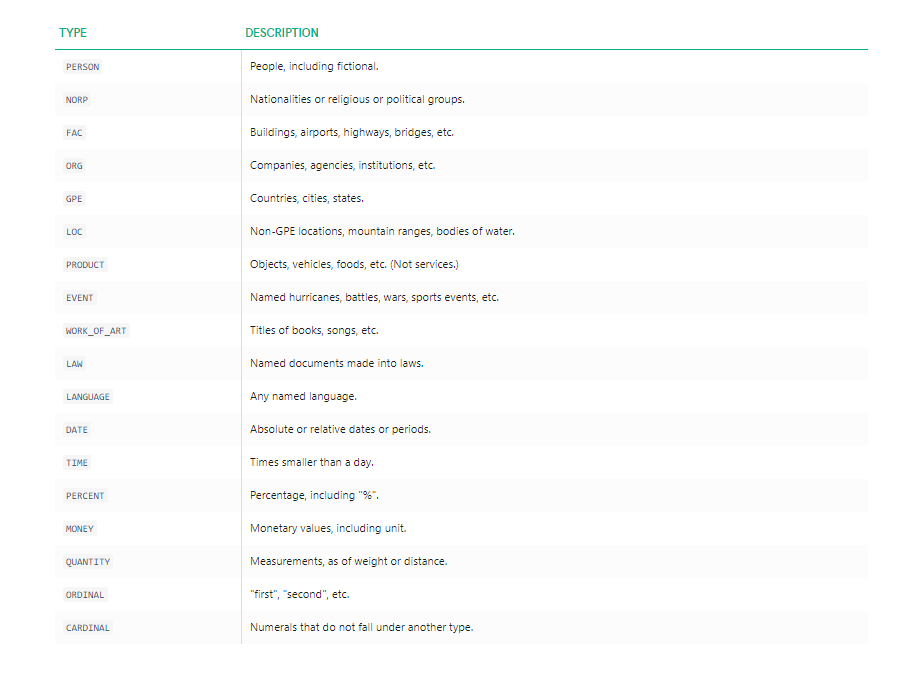

### Exemplo

Chatbot

In [ ]:
doc4 = nlp('reserve uma passagem saindo de Guarulhos e chegando em Maceió')

In [ ]:
# identificando a posição dos tokens reconhecidos como lugar
lugares = {entidade.text: entidade.start for entidade in doc4.ents if entidade.label_ == "LOC"}
lugares

{'Guarulhos': 5, 'Maceió': 9}

In [ ]:
# extraindo os tokens
origem = doc4[lugares['Guarulhos']]
destino = doc4[lugares['Maceió']]

## Bag of Words

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1
